## Machine Learning
### Recursos Avançados Aplicados ao Aprendizado Supervisionado


In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler

## Carga e análise do Dataset

In [11]:
# Informa a URL de importação do dataset
#url = "https://raw.githubusercontent.com/tatianaesc/datascience/main/diabetes.csv"
#url = "https://github.com/marcos-vmiranda/pos-pucrj-mvp/blob/732bb70e9d90a4ebeac4e71f7ed4a645f6147fb6/atrasos_tratados.csv?raw=true"
url = "c:/pos/MVP1/atrasos_tratados.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# remove a coluna ordemViagem
#dataset = dataset.drop(columns=['OrdemViagem'])

# remove as linhas que tiverem algum valor NaN
dataset = dataset.dropna(axis=0, how='any').dropna(axis=1, how='any')

# exibe informações do dataset
print("\n")
print("Informações do dataset")
print("\n")
dataset.info()

# Mostra as primeiras linhas do dataset
print("\n")
print("Primeiras linhas do dataset")
print("\n")
print(dataset.head(5))

# Verifica o tipo de cada atributo do dataset
print(dataset.dtypes)

# exibindo um sumário estatístico
print("\n")
print("Sumário estatístico do dataset")
print("\n")
dataset.describe()

# Verifica a distribuição das classes
print("\n")
print("Distribuição das classes")
print("\n")
print(dataset.groupby('Atraso').size())





Informações do dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22807 entries, 0 to 22806
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quantidade      22807 non-null  int64  
 1   DiaDaSemana     22807 non-null  int64  
 2   Turno           22807 non-null  int64  
 3   TipoFrete       22807 non-null  int64  
 4   TipoTransporte  22807 non-null  int64  
 5   OrdemViagem     22807 non-null  int64  
 6   PercAtraso      22807 non-null  float64
 7   Atraso          22807 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 1.4 MB


Primeiras linhas do dataset


   Quantidade  DiaDaSemana  Turno  TipoFrete  TipoTransporte  OrdemViagem  \
0           6            5      1          0               1            1   
1           6            5      1          0               1            1   
2           6            6      2          0               1            1   
3           6            

## Análise de features

### Histograma
Foi utilizado o histograma para analisar a distribuição dos valores de cada feature

### Boxplot
Foi utilizado o boxplot para dar um retrato rápido da distribuição das features. Através dele é possível ver que os valores possuem escalas muito semelhantes (entre 0 a 10). Através dos primeiros e terceiros quartis não foram observadas variabilidades absurdas.
Na feature TipoTransporte foram observados alguns outliers

## Heatmap
Foi utilizado o mapa de calor(Heatmap) de correlações da biblioteca seaborn ver quais variáveis se correlacionam com o target (relevância inicial) e detectar multicolinearidade (features muito parecidas entre si).
O gráfico mostrou que a feature com maior correlação é o "PercAtraso" e a com menor correlação é o "TipoFrete"
Foi verificado que não existem features com a correlação muito alta entre si (>0.8), então foi decidido não retirar nenhuma

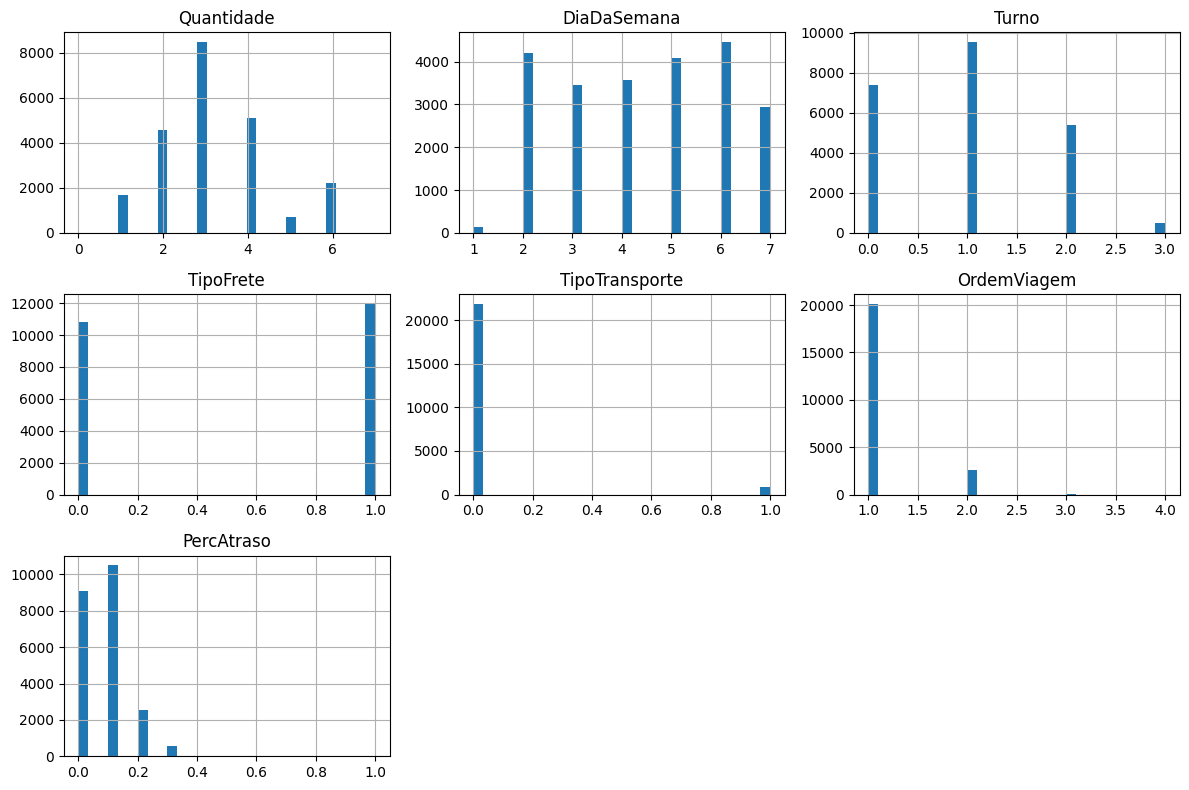



Boxplot dos atributos numéricos


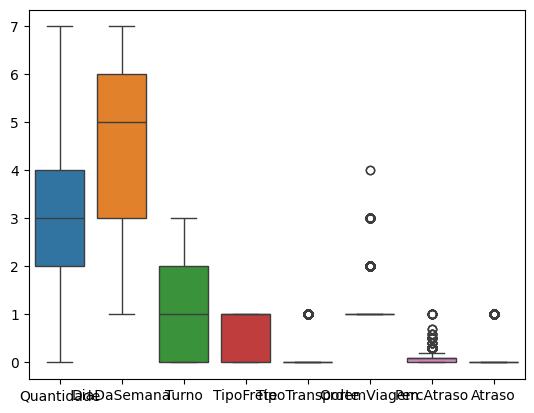

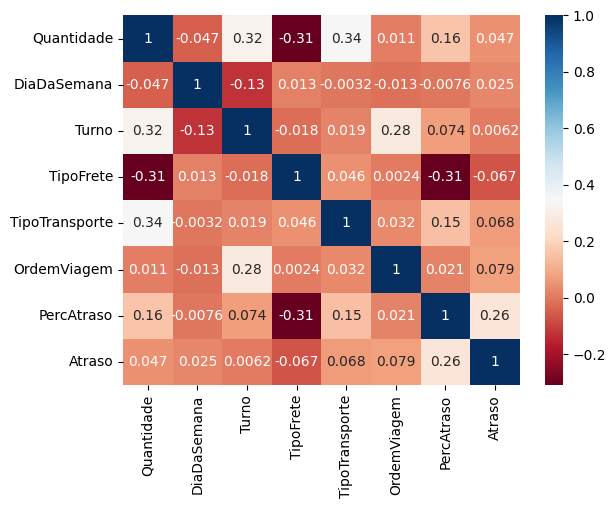

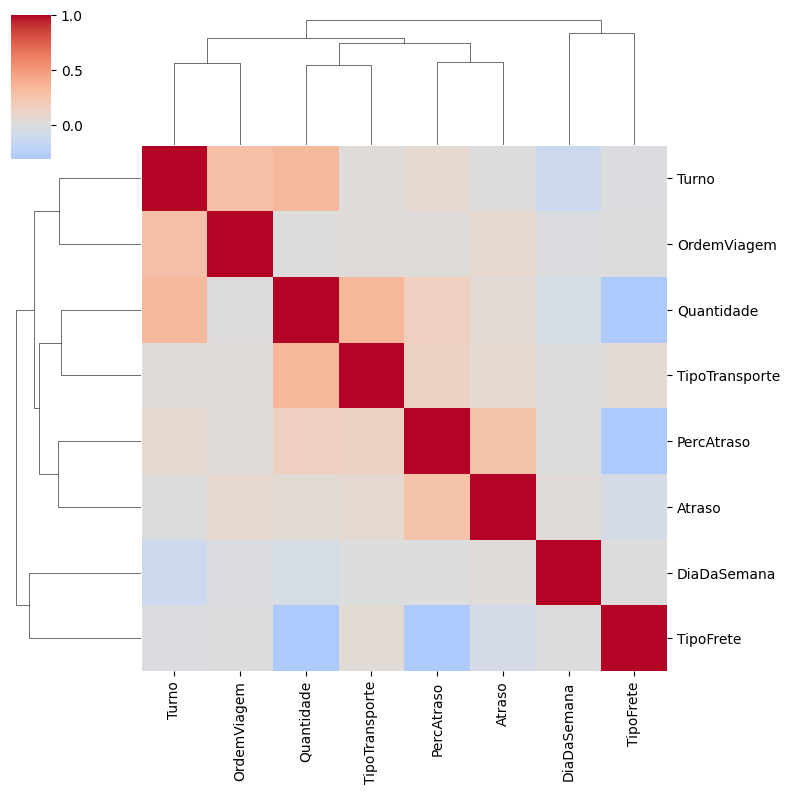

In [4]:
# Histograma
dataset.drop(columns=['Atraso']).hist(bins=30, figsize=(12,8), layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

# boxplot com Seaborn
print("\n")
print("Boxplot dos atributos numéricos")
sns.boxplot(data = dataset);
plt.show()

corr = dataset.corr(method='pearson') # utilizado o método pearson, pois é mais adequado a targets ser binário

# matriz de correlação com seaborn
sns.heatmap(corr, annot=True, cmap='RdBu');
plt.show()

# Agrupa features por similaridade de correlação
sns.clustermap(corr, cmap="coolwarm", center=0, figsize=(8,8))
plt.show()

# Balanceamento

In [1]:
#Elimina as colunas TipoTransporte e OrdemViagem
#dataset = dataset.drop(columns=['TipoTransporte', 'OrdemViagem'])
#Em classificação desequilibrada, considere estratégias para desbalanceamento (ex.: class_weight, undersampling/oversampling).

# Verifica a distribuição das classes antes
print("\nDistribuição das classes original (não balanceadas)\n")
print(dataset.groupby('Atraso').size())

# Separa os datasets de cada grupo
classe_maioria = dataset[dataset['Atraso'] == 0]
classe_minoria = dataset[dataset['Atraso'] == 1]

# Undersample da classe majoritária, limitando a proporção de desbalanceamento em 50 %
proporcaoBalanceamento = (len(classe_minoria) / len(classe_maioria))
print(f"\nProporção de balanceamento original: {proporcaoBalanceamento*100:.1f}%")
if (proporcaoBalanceamento < 0.50):
    print("Realizando undersampling da classe majoritária para reduzir desbalanceamento")
    nAmostras = round(proporcaoBalanceamento * 2  * len(classe_maioria))
    classe_maioria_undersampled = classe_maioria.sample(n=nAmostras, random_state=seed)
    print(f"Número de amostras na classe majoritária após undersampling: {len(classe_maioria_undersampled)}")
    # Junta as duas classes
    dataset_balanceado = pd.concat([classe_maioria_undersampled, classe_minoria])
    # Embaralha o dataset balanceado
    dataset_balanceado = dataset_balanceado.sample(frac=1, random_state=seed).reset_index(drop=True)
    proporcaoBalanceamento = (len(classe_minoria) / (len(classe_maioria_undersampled)))
    print(f"Proporção de balanceamento após undersampling: {proporcaoBalanceamento*100:.1f}%")
    # Verifica a distribuição das classes balanceadas
    print("\nDistribuição das classes após balanceamento:\n")
    print(dataset_balanceado.groupby('Atraso').size())
else:
    print("O desbalanceamento original é menor que 50%, não será realizado undersampling")



Distribuição das classes original (não balanceadas)



NameError: name 'dataset' is not defined

## Separação em conjunto de treino e teste

In [13]:
test_size = 0.20 # tamanho do conjunto de teste
# Definindo uma semente global. Necessário para garantir reprodutibilidade dos resultados, 
# Faz com que os mesmos números aleatórios sejam gerados em todas as execuções.
seed = 7

# Separação em conjuntos de treino e teste
array = dataset.values
numCols = len(dataset.columns)
X = array[:,0:numCols-1]
y = array[:,numCols-1].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
# Como o dataset é fortemente desbalanceado, a escolha da métrica é muito importante.
# O uso do scoring accuracy não é recomendado nesse caso, pois o modelo pode acertar quase tudo prevendo só "0" e ainda assim parecer "bom", mas não terá utilidade.
# Nesse cenário, é melhor utilizar um scoring que leve em conta o desbalanceamento, como 'precision', 'recall' ou 'f1'.
# Foi escolhido o scoring 'precision', pois no problema em análise se deseja minimizar os falsos positivos (alertas falsos são problemáticos).

scoring = 'accuracy' # métricas: 'accuracy', 'precision', 'recall', 'f1'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Avaliação de modelos com os parâmetros padrão

dummy: 0.500176 (0.000660)
LR: 0.676680 (0.016556)
Ridge: 0.671032 (0.013968)
KNN: 0.627258 (0.013652)
CART: 0.627607 (0.009368)
NB: 0.646682 (0.021892)
SVM: 0.627622 (0.023635)
Bagging: 0.644906 (0.011242)
RF: 0.646313 (0.015062)
ET: 0.634666 (0.016015)
Ada: 0.677738 (0.017248)
GB: 0.680198 (0.014256)


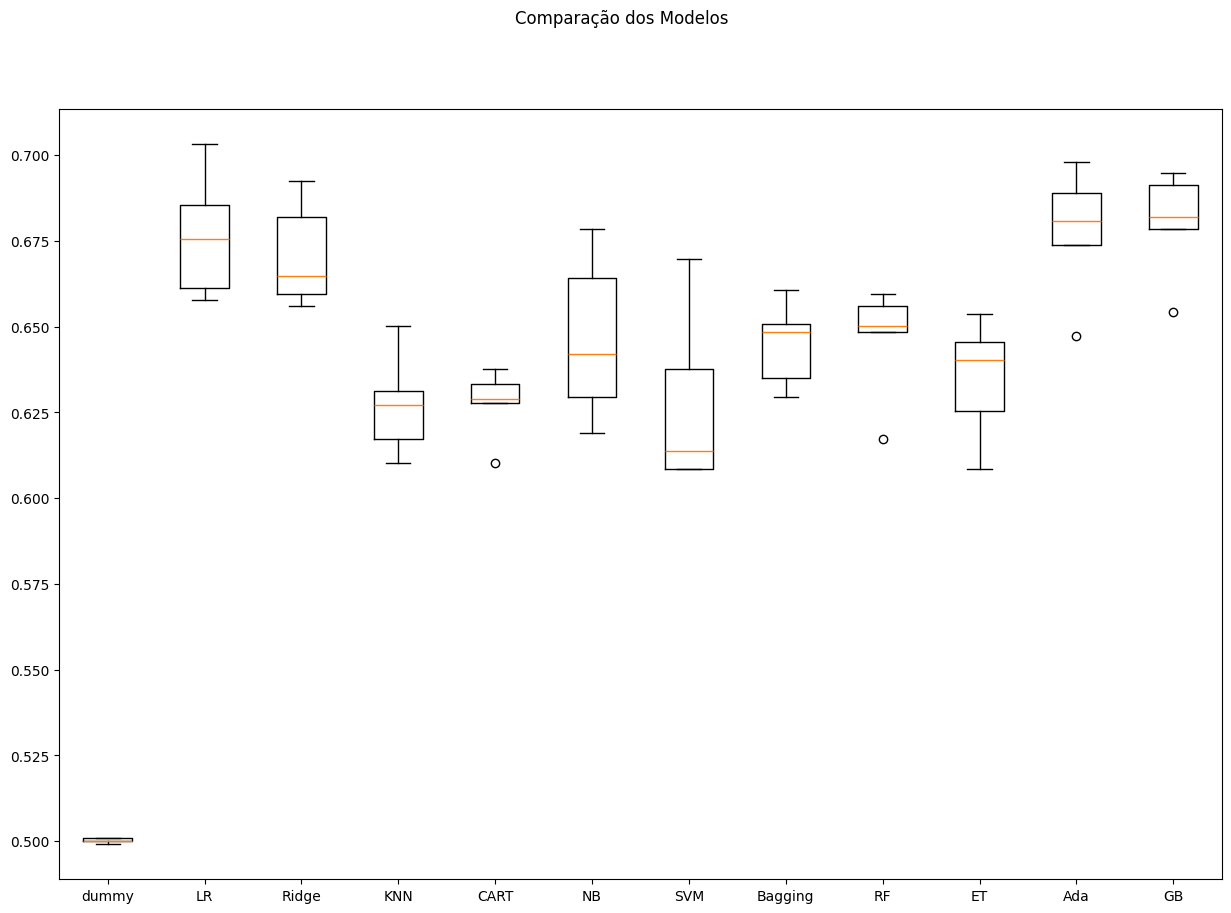

In [14]:
# Definindo uma semente global. Necessário para garantir reprodutibilidade dos resultados, 
# Faz com que os mesmos números aleatórios sejam gerados em todas as execuções.
np.random.seed(7)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(("dummy", DummyClassifier(strategy="most_frequent", random_state=seed)))
models.append(('LR', LogisticRegression()))
models.append(('Ridge', RidgeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression()
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
#models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.924 (0.001)
Ridge-orig: 0.923 (0.001)
KNN-orig: 0.918 (0.003)
CART-orig: 0.920 (0.001)
NB-orig: 0.882 (0.005)
SVM-orig: 0.922 (0.000)
Bag-orig: 0.919 (0.001)
RF-orig: 0.920 (0.001)
ET-orig: 0.920 (0.001)
Ada-orig: 0.923 (0.001)
GB-orig: 0.924 (0.001)
LR-padr: 0.923 (0.001)
Ridge-padr: 0.923 (0.001)
KNN-padr: 0.918 (0.003)
CART-padr: 0.920 (0.001)
NB-padr: 0.882 (0.005)
SVM-padr: 0.923 (0.001)
Bag-padr: 0.919 (0.001)
RF-padr: 0.920 (0.001)
ET-padr: 0.920 (0.002)
Ada-padr: 0.923 (0.001)
GB-padr: 0.924 (0.001)
LR-norm: 0.924 (0.001)
Ridge-norm: 0.923 (0.001)
KNN-norm: 0.918 (0.003)
CART-norm: 0.920 (0.001)
NB-norm: 0.882 (0.005)
SVM-norm: 0.923 (0.001)
Bag-norm: 0.919 (0.001)
RF-norm: 0.920 (0.001)
ET-norm: 0.920 (0.001)
Ada-norm: 0.923 (0.001)
GB-norm: 0.924 (0.001)


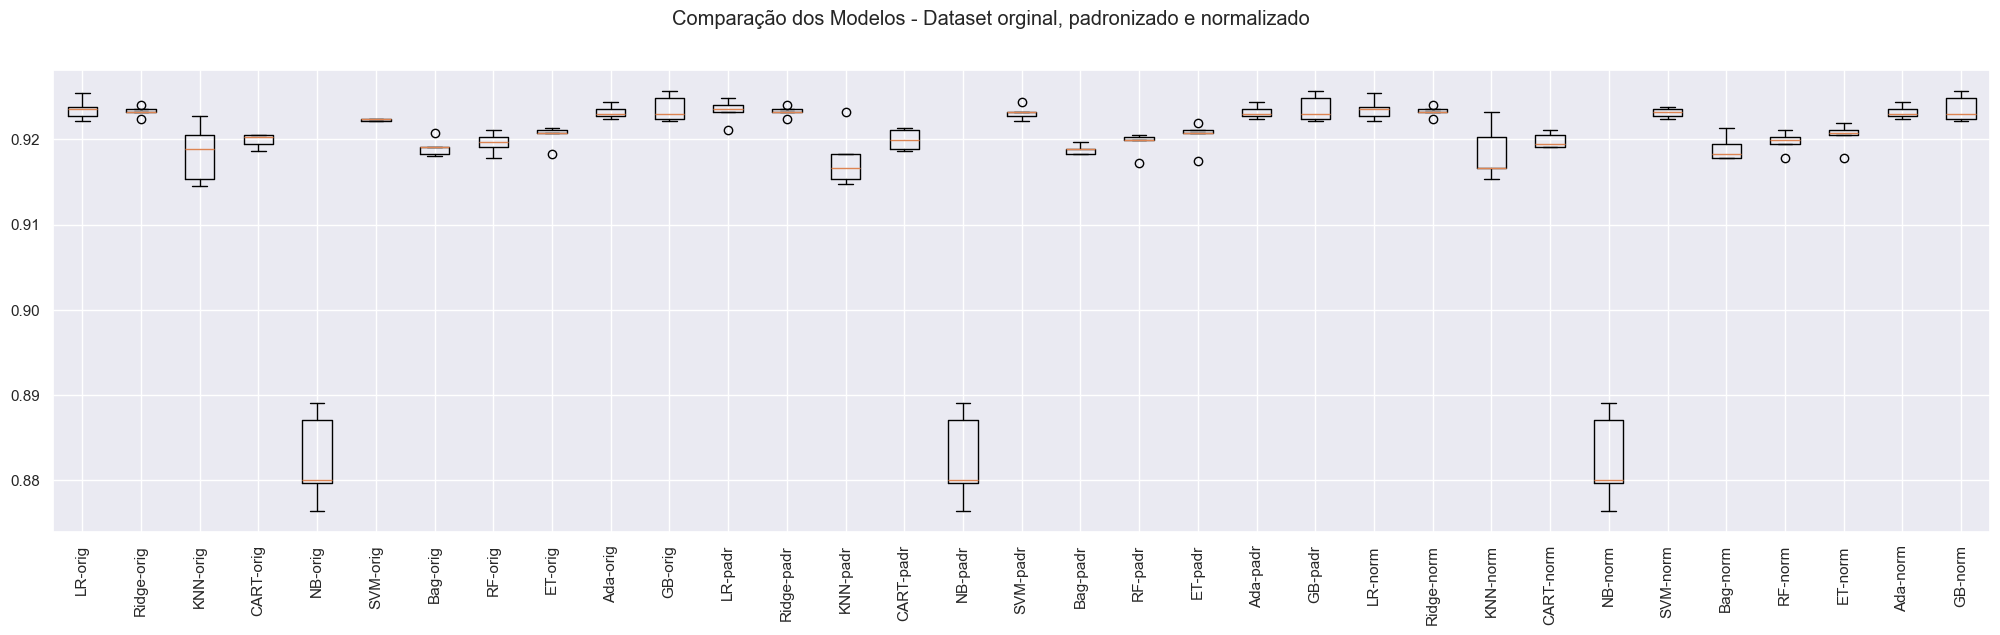

In [145]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
ridge = ('Ridge', RidgeClassifier())
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
#voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
#pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
#pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
#pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [15]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
#pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
#pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.635374 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13}


In [16]:
# Tuning do Logistic Regression

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
log_reg = ('LogisticRegression', LogisticRegression())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('log_reg-orig', Pipeline(steps=[log_reg])))
pipelines.append(('log_reg-padr', Pipeline(steps=[standard_scaler, log_reg])))
pipelines.append(('log_reg-norm', Pipeline(steps=[min_max_scaler, log_reg])))

param_grid = {
    'LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10],
    'LogisticRegression__penalty': ['l1', 'l2'],
    'LogisticRegression__solver': ['flbfgs','liblinear'],
    'LogisticRegression__max_iter': [100, 200],
    'LogisticRegression__class_weight': [None, 'balanced'],    
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: log_reg-orig - Melhor: 0.678096 usando {'LogisticRegression__C': 1, 'LogisticRegression__class_weight': None, 'LogisticRegression__max_iter': 100, 'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}
Sem tratamento de missings: log_reg-padr - Melhor: 0.683394 usando {'LogisticRegression__C': 0.1, 'LogisticRegression__class_weight': None, 'LogisticRegression__max_iter': 100, 'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}
Sem tratamento de missings: log_reg-norm - Melhor: 0.678450 usando {'LogisticRegression__C': 1, 'LogisticRegression__class_weight': None, 'LogisticRegression__max_iter': 100, 'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}


In [17]:
# Tuning do Ridge Classifier

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
ridge = ('RidgeClassifier', RidgeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('ridge-orig', Pipeline(steps=[ridge])))
pipelines.append(('ridge-padr', Pipeline(steps=[standard_scaler, ridge])))
pipelines.append(('ridge-norm', Pipeline(steps=[min_max_scaler, ridge])))

param_grid = {
    'RidgeClassifier__alpha': [0.001, 0.01, 0.1, 1, 10],
    'RidgeClassifier__solver': ['auto', 'saga', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'lbfgs'],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="recall", cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: ridge-orig - Melhor: 0.617250 usando {'RidgeClassifier__alpha': 1, 'RidgeClassifier__solver': 'auto'}
Sem tratamento de missings: ridge-padr - Melhor: 0.615834 usando {'RidgeClassifier__alpha': 0.001, 'RidgeClassifier__solver': 'auto'}
Sem tratamento de missings: ridge-norm - Melhor: 0.619345 usando {'RidgeClassifier__alpha': 10, 'RidgeClassifier__solver': 'lsqr'}


In [18]:
# Tuning do Naive bayes

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
nb = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('nb-orig', Pipeline(steps=[nb])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, nb])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, nb])))

param_grid = {
    'NB__var_smoothing': np.logspace(0,-9, num=100)
    
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: nb-orig - Melhor: 0.647035 usando {'NB__var_smoothing': np.float64(0.0001)}
Sem tratamento de missings: nb-padr - Melhor: 0.647036 usando {'NB__var_smoothing': np.float64(0.012328467394420659)}
Sem tratamento de missings: nb-norm - Melhor: 0.646682 usando {'NB__var_smoothing': np.float64(0.0004328761281083057)}


In [19]:
# Tuning do Extra Trees

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
ET = ('ET', ExtraTreesClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('ET-orig', Pipeline(steps=[ET])))
pipelines.append(('ET-padr', Pipeline(steps=[standard_scaler, ET])))
pipelines.append(('ET-norm', Pipeline(steps=[min_max_scaler, ET])))

param_grid = {
    'ET__n_estimators': [50, 100, 200],
    'ET__max_features': [1, 2, 3],
    'ET__min_samples_split': [2, 5, 10]    
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: ET-orig - Melhor: 0.665023 usando {'ET__max_features': 3, 'ET__min_samples_split': 10, 'ET__n_estimators': 50}
Sem tratamento de missings: ET-padr - Melhor: 0.665021 usando {'ET__max_features': 2, 'ET__min_samples_split': 10, 'ET__n_estimators': 50}
Sem tratamento de missings: ET-norm - Melhor: 0.664315 usando {'ET__max_features': 3, 'ET__min_samples_split': 10, 'ET__n_estimators': 200}


In [20]:
# Tuning do Gradient Boosting

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
GB = ('GB', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline(steps=[GB])))
pipelines.append(('GB-padr', Pipeline(steps=[standard_scaler, GB])))
pipelines.append(('GB-norm', Pipeline(steps=[min_max_scaler, GB])))

param_grid = {
    'GB__n_estimators': [50, 100, 200],
    'GB__max_features': [1, 2, 3],
    'GB__min_samples_split': [2, 5, 10]    
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: GB-orig - Melhor: 0.685856 usando {'GB__max_features': 1, 'GB__min_samples_split': 2, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-padr - Melhor: 0.689032 usando {'GB__max_features': 1, 'GB__min_samples_split': 2, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-norm - Melhor: 0.687608 usando {'GB__max_features': 2, 'GB__min_samples_split': 10, 'GB__n_estimators': 200}


In [21]:
# Tuning do Ada Boosting

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
AD = ('AD', AdaBoostClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('AD-orig', Pipeline(steps=[AD])))
pipelines.append(('AD-padr', Pipeline(steps=[standard_scaler, AD])))
pipelines.append(('AD-norm', Pipeline(steps=[min_max_scaler, AD])))

param_grid = {
    'AD__n_estimators': [50, 100, 200],
    'AD__learning_rate': [0.01, 0.1, 1.0]
    
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: AD-orig - Melhor: 0.682327 usando {'AD__learning_rate': 1.0, 'AD__n_estimators': 50}
Sem tratamento de missings: AD-padr - Melhor: 0.682327 usando {'AD__learning_rate': 1.0, 'AD__n_estimators': 50}
Sem tratamento de missings: AD-norm - Melhor: 0.682327 usando {'AD__learning_rate': 1.0, 'AD__n_estimators': 50}


In [27]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
#scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
#rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
#min_max_scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
#rescaledX = min_max_scaler.transform(X_train) # aplicação da normalização no conjunto de treino
#model = KNeighborsClassifier(metric='euclidean', n_neighbors=19) #PADRONIZADO
#model = LogisticRegression(max_iter=100,C=10,penalty='l2',solver='liblinear')
#model = RidgeClassifier(alpha=1, solver='auto')
#model = GaussianNB(var_smoothing=np.float64(0.0001)) #NORMALIZADO
#model = ExtraTreesClassifier(n_estimators=200, max_features=1, min_samples_split=2)
#model = GradientBoostingClassifier(n_estimators=200, max_features=1, min_samples_split=2)
model = AdaBoostClassifier(n_estimators=50, learning_rate=1)
#model = SVC(C=1.0, kernel='rbf', probability=True)
#model.fit(rescaledX, y_train)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
#rescaledTestX = min_max_scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, predictions)))
print("precision: " + str(precision_score(y_test, predictions,average='weighted')))
print("precision: " + str(precision_score(y_test, predictions,average='binary', pos_label=1)))
print("recall: " + str(recall_score(y_test, predictions,average='binary', pos_label=1)))
print("f1: " + str(f1_score(y_test, predictions,average='binary', pos_label=1)))

# Exibe a matriz de confusão
print("Matriz de confusão:")
print(confusion_matrix(y_test, predictions))


accuracy: 0.6614950634696756
precision: 0.6619367448534297
precision: 0.6706231454005934
recall: 0.6366197183098592
f1: 0.653179190751445
Matriz de confusão:
[[243 111]
 [129 226]]


In [28]:
# Preparação do modelo com TODO o dataset
#scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
#rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(X, y)

,estimator,None
,n_estimators,50
,learning_rate,1
,algorithm,'deprecated'
,random_state,None


## Simulando a aplicação do modelo em dados não vistos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quantidade      4398 non-null   int64  
 1   DiaDaSemana     4398 non-null   int64  
 2   Turno           4398 non-null   int64  
 3   TipoFrete       4398 non-null   int64  
 4   TipoTransporte  4398 non-null   int64  
 5   OrdemViagem     4398 non-null   int64  
 6   PercAtraso      4398 non-null   float64
 7   Atraso          4398 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 275.0 KB
None
Distribuição das classes
Atraso
0    3939
1     459
dtype: int64
[[6.  2.  2.  0.  0.  1.  0.1 0. ]
 [6.  3.  0.  0.  1.  1.  0.1 0. ]
 [6.  2.  2.  0.  0.  1.  0.1 0. ]
 [6.  2.  2.  0.  0.  1.  0.1 0. ]
 [6.  2.  2.  0.  0.  1.  0.  0. ]]
y_test:      [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predictions: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
accuracy: 0.6975

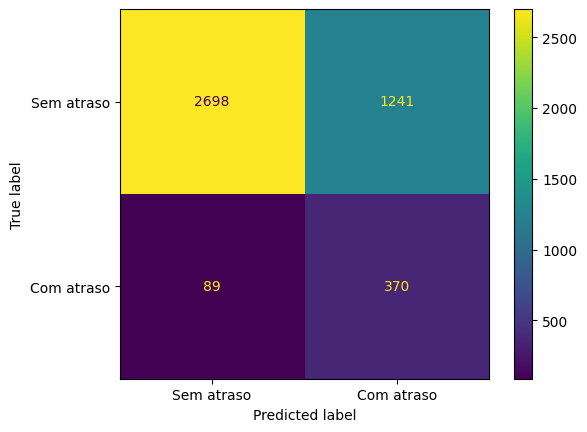


Relatório de Classificação:
              precision    recall  f1-score   support

  Sem atraso       0.97      0.68      0.80      3939
  Com atraso       0.23      0.81      0.36       459

    accuracy                           0.70      4398
   macro avg       0.60      0.75      0.58      4398
weighted avg       0.89      0.70      0.76      4398



In [29]:
# Teste com novos dados - julho/2025
# Lê o arquivo
#url = "https://github.com/marcos-vmiranda/pos-pucrj-mvp/blob/732bb70e9d90a4ebeac4e71f7ed4a645f6147fb6/atrasos_julho_tratados.csv?raw=true"
url = "c:/pos/MVP1/atrasos_junho_tratados.csv"
datasetTest = pd.read_csv(url, delimiter=',')
print(datasetTest.info())

print("Distribuição das classes")
print(datasetTest.groupby('Atraso').size())

array = datasetTest.values
#array = array[array[:,numCols-1] == 0] # Varre o data dataset e cria um array somente com as linhas cuja coluna 7 sejam maiores que 0
print(array[0:5])

X_test = array[:,0:numCols-1]
y_test = array[:,numCols-1]
predictions = model.predict(X_test)

print("y_test:      " + str(y_test[0:20]) )
print("predictions: " + str(predictions[0:20]))

print("accuracy: " + str(accuracy_score(y_test, predictions)))
print("precision: " + str(precision_score(y_test, predictions)))
print("recall: " + str(recall_score(y_test, predictions)))
print("f1: " + str(f1_score(y_test, predictions)))

# Exibe a matriz de confusão
print("Matriz de confusão:")
cm=confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem atraso', 'Com atraso'])
disp.plot()
plt.show()

print()
# Exibe o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, predictions, target_names=['Sem atraso', 'Com atraso']))

In [ ]:
# Novos dados
data = {'Quantidade':  [1, 3, 6, 4],
        'DiaDaSemana': [0, 1, 2, 4],
        'Turno': [0, 1, 3, 3],
        'TipoFrete': [0, 0, 1, 1],
        'TipoTransporte': [1, 1, 1, 1],
        'OrdemViagem': [1, 2, 1, 1],
        'PercAtraso': [0.0, 0.2, 0.2, 0]
        }

atributos = ['Quantidade', 'DiaDaSemana', 'Turno', 'TipoFrete', 'TipoTransporte', 'OrdemViagem', 'PercAtraso']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:numCols-1].astype(float)
X_entrada = [[6.,  2.,  3.,  0.,  3.,  1.,  0.5 ]]

print("Novos dados:")
print(X_entrada)
# Padronização nos dados de entrada usando o scaler utilizado em X
#rescaledEntradaX = scaler.transform(X_entrada)
#print(rescaledEntradaX)

# Predição de classes dos dados de entrada
print("Predições para os novos dados:")
saidas = model.predict(X_entrada)
print(saidas)